In [22]:
import numpy as np
from sys import getsizeof
import time
import copy
import matplotlib.pyplot as plt

def dominate (record1, record2):
  result0 = record1[0] - record2[0]
  result1 = record1[1] - record2[1]
  
  if result0<0 and result1<0:
    return 2
  if result0<0 and result1>0:
    return 0
  if result0<0 and result1==0:
    return 2
  if result0>0 and result1<0:
    return 0
  if result0>=0 and result1>=0:
    return 1
  if result0==0 and result1<0:
    return 2


In [23]:
def skyline(origin_database) :
    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    w_size = 2
    count =1
    window = []
    temp = []
    skylines = []
    
    while database :
        print('\n')
        print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                print('append : window is ', window)
                database.remove(record)
                print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False
            """
            if count != 1:
              for sky in list(skylines):
                if dominate(sky, record)==2:
                  print('skyline에서 비교할 친구는 sky : ', sky)
                  print('sky가 제일 좋아 : skylines : ', skylines)
                  database.remove(record)
                  record_dominated=True
              continue
            """


            for target in list(window) :
                print('\nthis turn record is ', record)
                print('this turn target is ', target)
                if dominate(record, target) == 1 :
                    print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True
                    """
                    if count != 1:
                      print('실행할겡 ~!')
                      for record_1 in list(skylines):
                        if dominate(record_1, target)==2:
                          print('d=2 : remove from window by skylines is ', target)
                          window.remove(target)
                          if len(window)==0:
                            break
                    """
                    break
                elif dominate(record, target) == 2 :
                    print('d=2 : remove from window is ', target)
                    window.remove(target)
                    """
                    if count != 1 :
                        print('실행할겡 ~!')
                        for record_1 in list(skylines):
                          if dominate(record_1, target) == 2:
                            print('d=2 : remove from window by skylines is ,', target)
                            window.remove(target)
                            if len(window)==0:
                              break
                    """
                    continue
                elif dominate(record, target) == 0 :
                    print('incomparable')
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
                print('append : window is ', window)
            else :
                
                temp.append(record)
                print('append : temp is', temp)
            database.remove(record)            
        print('count는 ',count)
        
        if count != 1 :
          for target in list(window):
            print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 2:
                if len(window)!= 0 :
                  print('지금 window는 : ', window)
                  print('지금 target은 :', target)

                  window.remove(target)
                  print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 1:
                print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        print('skyline : ', skylines)
        count += 1
        database = database + temp
        print('database : ', database)
        temp.clear()
        print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    print('window: ',window)
    print('skylines : ',skylines)
    print('database: ',database)
    return skylines

In [214]:
import random
origin_database=[]
num=50
for i in range(num):
  a=[random.randint(10,50) for r in range(2)]
  c=[a[0],a[1]]
  origin_database.append(c)


In [215]:
def partion(origin_database):
  
  d1_sum=0
  d2_sum=0
  for i in range(len(origin_database)):
    d1_sum = d1_sum+origin_database[i][0]
    d1_average=d1_sum/len(origin_database)
    d2_sum = d2_sum+origin_database[i][1]
    d2_average=d2_sum/len(origin_database)
    

  p11=[]
  p21=[]
  p12=[]
  p22=[]
  for i in range(len(origin_database)):
    if origin_database[i][0]<d1_average and origin_database[i][1]<d2_average :
      p11.append(origin_database[i])
    elif origin_database[i][0]>d1_average and origin_database[i][1]>d2_average :
      p22.append(origin_database[i])  
    elif origin_database[i][0]>=d1_average and origin_database[i][1]<=d2_average :
      p21.append(origin_database[i])  
    elif origin_database[i][0]<=d1_average and origin_database[i][1]>=d2_average :
      p12.append(origin_database[i])  

  return p11,p21,p12,p22,d1_average,d2_average


In [216]:
p11=partion(origin_database)[0]
p21=partion(origin_database)[1]
p12=partion(origin_database)[2]
p22=partion(origin_database)[3]
d1_average=partion(origin_database)[4]
d2_average=partion(origin_database)[5]

In [217]:
def plot_sky(result_1):
  print("skyline",result_1[1])

  for record in origin_database:
    plt.scatter(record[0],record[1],c="blue")
    
  for rrr in result_1[1]:
    plt.scatter(rrr[0],rrr[1],c="red") 
  print("time:",result_1[0])

In [218]:
def skyline_draw(origin_database,color):
  result_1=skyline(origin_database)
  for record in origin_database:
      plt.scatter(record[0],record[1],c=color)
  for rrr in result_1:
      plt.scatter(rrr[0],rrr[1],c="red") 

In [219]:
partion(origin_database)[0]

[[21, 31],
 [16, 13],
 [27, 31],
 [25, 32],
 [20, 14],
 [23, 17],
 [28, 31],
 [20, 21],
 [12, 25],
 [23, 13],
 [19, 13],
 [18, 31],
 [13, 26],
 [25, 25]]

In [220]:
s11=skyline(p11)
s21=skyline(p21)
s12=skyline(p12)
s22=skyline(p22)




1 번째 iteration
append : window is  [[21, 31]]
remove from database is  [21, 31]

this turn record is  [16, 13]
this turn target is  [21, 31]
d=2 : remove from window is  [21, 31]
append : window is  [[16, 13]]

this turn record is  [27, 31]
this turn target is  [16, 13]
d=1 : remove from database is  [27, 31]

this turn record is  [25, 32]
this turn target is  [16, 13]
d=1 : remove from database is  [25, 32]

this turn record is  [20, 14]
this turn target is  [16, 13]
d=1 : remove from database is  [20, 14]

this turn record is  [23, 17]
this turn target is  [16, 13]
d=1 : remove from database is  [23, 17]

this turn record is  [28, 31]
this turn target is  [16, 13]
d=1 : remove from database is  [28, 31]

this turn record is  [20, 21]
this turn target is  [16, 13]
d=1 : remove from database is  [20, 21]

this turn record is  [12, 25]
this turn target is  [16, 13]
incomparable
append : window is  [[16, 13], [12, 25]]

this turn record is  [23, 13]
this turn target is  [16, 13]
d=1 : 



1 번째 iteration
append : window is  [[21, 31]]
remove from database is  [21, 31]

this turn record is  [16, 13]
this turn target is  [21, 31]
d=2 : remove from window is  [21, 31]
append : window is  [[16, 13]]

this turn record is  [27, 31]
this turn target is  [16, 13]
d=1 : remove from database is  [27, 31]

this turn record is  [25, 32]
this turn target is  [16, 13]
d=1 : remove from database is  [25, 32]

this turn record is  [20, 14]
this turn target is  [16, 13]
d=1 : remove from database is  [20, 14]

this turn record is  [23, 17]
this turn target is  [16, 13]
d=1 : remove from database is  [23, 17]

this turn record is  [28, 31]
this turn target is  [16, 13]
d=1 : remove from database is  [28, 31]

this turn record is  [20, 21]
this turn target is  [16, 13]
d=1 : remove from database is  [20, 21]

this turn record is  [12, 25]
this turn target is  [16, 13]
incomparable
append : window is  [[16, 13], [12, 25]]

this turn record is  [23, 13]
this turn target is  [16, 13]
d=1 : 

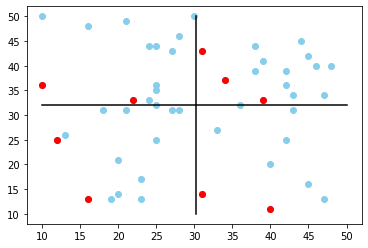

In [221]:
skyline_draw(p11,"skyblue")
skyline_draw(p21,"skyblue")
skyline_draw(p12,"skyblue")
skyline_draw(p22,"skyblue")

x=[d1_average,d1_average]
y=[10,50]

plt.plot(x,y,c='black')
x=[10,50]
y=[d2_average,d2_average]

plt.plot(x,y,c='black')
plt.show()



In [222]:
s11,s21,s12,s22

([[16, 13], [12, 25]],
 [[40, 11], [31, 14]],
 [[10, 36], [22, 33]],
 [[39, 33], [34, 37], [31, 43]])

In [223]:
#merging s11 and s21
temporary=[]
for a11 in s11:
  for a21 in s21:
    if dominate(a21,a11)==1: #a11가 지배
      temporary.append(a21)

s21= [x for x in s21 if x not in temporary]   
R1=s11+s21
R1


[[16, 13], [12, 25], [40, 11]]



1 번째 iteration
append : window is  [[27, 43]]
remove from database is  [27, 43]

this turn record is  [25, 36]
this turn target is  [27, 43]
d=2 : remove from window is  [27, 43]
append : window is  [[25, 36]]

this turn record is  [25, 35]
this turn target is  [25, 36]
d=2 : remove from window is  [25, 36]
append : window is  [[25, 35]]

this turn record is  [25, 44]
this turn target is  [25, 35]
d=1 : remove from database is  [25, 44]

this turn record is  [10, 50]
this turn target is  [25, 35]
incomparable
append : window is  [[25, 35], [10, 50]]

this turn record is  [10, 36]
this turn target is  [25, 35]
incomparable

this turn record is  [10, 36]
this turn target is  [10, 50]
d=2 : remove from window is  [10, 50]
append : window is  [[25, 35], [10, 36]]

this turn record is  [28, 46]
this turn target is  [25, 35]
d=1 : remove from database is  [28, 46]

this turn record is  [16, 48]
this turn target is  [25, 35]
incomparable

this turn record is  [16, 48]
this turn target is  [

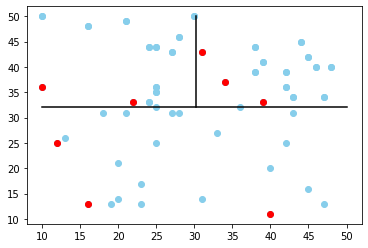

In [224]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
for record in R1:
      plt.scatter(record[0],record[1],c="red")

skyline_draw(p12,"skyblue")
skyline_draw(p22,"skyblue")

x=[d1_average,d1_average]
y=[d2_average,50]

plt.plot(x,y,c='black')
x=[10,50]
y=[d2_average,d2_average]

plt.plot(x,y,c='black')
plt.show()





In [225]:
#merging s12 and s22
temporary=[]
for a12 in s12:
  for a22 in s22:
    if dominate(a22,a12)==1: #a2가 지배
      temporary.append(a22)
s22= [x for x in s22 if x not in temporary]    
R2=s12+s22
R2


[[10, 36], [22, 33]]

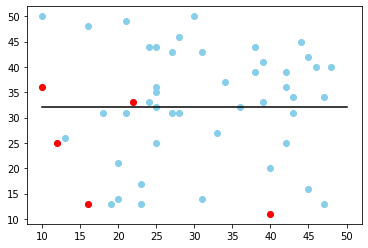

In [226]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
for record2 in R2:
      plt.scatter(record2[0],record2[1],c="red")
for record1 in R1:
      plt.scatter(record1[0],record1[1],c="red")
x=[10,50]
y=[d2_average,d2_average]

plt.plot(x,y,c='black')


In [227]:
#merging s11 and R2
temporary_r2=[]
temporary_s11=[]

for a11 in s11:
  for a2 in R2:
    if dominate(a2,a11)==1: #a2가 지배
      temporary_r2.append(a2)
    elif dominate(a11,a2)==2:
      temporary_s11.append(a11)  
R2= [x for x in R2 if x not in temporary_r2]
s11= [x for x in s11 if x not in temporary_s11]
    
R3=s11+R2
R3


[[16, 13], [12, 25], [10, 36]]

In [228]:
R=R1+R3

new_R = []
for v in R:
    if v not in new_R:
        new_R.append(v)
print(new_R)

[[16, 13], [12, 25], [40, 11], [10, 36]]


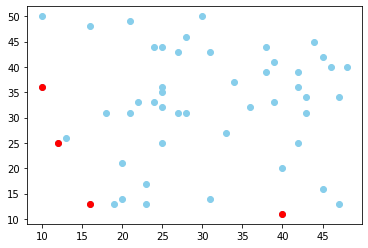

In [230]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
for record2 in new_R:
      plt.scatter(record2[0],record2[1],c="red")
